# K-nearest-neighbours alogrithm
The aim of this exercise is to get knowledge of how kNN algorithm exactly work by developing it from scratch on simple Iris dataset

# Pipeline

Our exercise has several steps:
1. getting the iris dataset
2. converting the dataset to pandas format
3. splitting dataset into train/test part
4. defining distance metric - we are going to use euclidean one
5. creating a function that will find nearest neighbours for given example
6. predicting the specie value for each observation in train set and assess the classifiaction error
7. predicting the specie value for each observation in test set
8. Investigating confusion matrix
9. Analyzing test error based on different k parameter

#### Importing relevant libraries

In [1]:
import pandas as pd
import numpy as np
# we remove the scientific notation to be displayed
np.set_printoptions(suppress=True)
# we set up the float format for pandas
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## 1. Getting iris dataset
Firstly we need to get data. To do this we can use one of sklearn's packages called dataset - this is the only one place where we will use sklearn in this notebook ;)

In [2]:
from sklearn import datasets

In [3]:
iris = datasets.load_iris()

We can access the data with .data property. The target variable (which tells us about the specie of particular observation) is accessed with .target

In [4]:
iris.data

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [5]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## 2. Converting the dataset to pandas format

We have loaded python's arrays containing both features and target variable. Our aim for now is to merge them into one pandas DataFrame as it is basic data structure for data analysis and machine learning

In [6]:
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])

After creating DataFrame we should add the column with target variable. Let's call it 'target' and assign the array with target to the DataFrame created.

In [7]:
iris_df['target'] = iris.target

Let's shuffle data. You can do it multiple ways:
* sample (DataFrame property) with fraction argument set to be 1
* shuffle function from sklearn.utils package
* np.random.shuffle function (it should take np.ndarray, so you should pass DF.values)

In [8]:
iris_df = iris_df.sample(frac=1).reset_index(drop=True)

With typical DF properties we can examine the structure of the iris dataset. You should show:

* first five elements from the DataFrame

In [9]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.700,2.800,4.100,1.300,1
1,6.200,3.400,5.400,2.300,2
2,5.600,2.500,3.900,1.100,1
3,4.600,3.600,1.000,0.200,0
4,5.100,3.500,1.400,0.300,0


* last five elements from the DataFrame

In [10]:
iris_df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.500,3.000,5.200,2.000,2
146,6.500,3.000,5.800,2.200,2
147,6.200,2.800,4.800,1.800,2
148,5.000,3.500,1.300,0.300,0
149,4.800,3.100,1.600,0.200,0


* a short statistical summary of all variables in the DataFrame

In [11]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000,150.000,150.000,150.000,150.000
mean,5.843,3.054,3.759,1.199,1.000
std,0.828,0.434,1.764,0.763,0.819
min,4.300,2.000,1.000,0.100,0.000
25%,5.100,2.800,1.600,0.300,0.000
50%,5.800,3.000,4.350,1.300,1.000
75%,6.400,3.300,5.100,1.800,2.000
max,7.900,4.400,6.900,2.500,2.000


## 3. Splitting dataset into train/test part

In a typical Machine Learning pipeline you should divide your dataset into two parts:
* train - it will be used to train the model (note that for k-nn algorithm there is no actual process of training - it is just computing the distance matrix between all observations)
* test - this part will be hold out of training process and will serve to assess the algorithms performance

You can do it in a few ways:
* train_test_split from sklearn package
* .sample method for DataFrame objects
* create a logical mask that would indicate wheter observations will be in train (TRUE) or test (FALSE) set

In [12]:
train_fraction = 0.8

# mask should be a logical array of dtype=bool that has about 80% of True values. How can we do that?
mask = np.random.rand(len(iris_df)) < train_fraction

# we apply mask on original dataset
train = iris_df[mask]
test = iris_df[~mask]

We can reset and remove (drop argument) index from frames, as this is not needed

In [13]:
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

## 4. Defining distance metric - we are going to use euclidean one
We need to create a function called 'euclidean_distance' that will return distance for given pair of observations

In [14]:
def euclidean_distance(array_1, array_2):
    # we need to create a distance function
    # it takes as inputs two numpy arrays each representing one object:
    # euclidean_distance = (x1 - y1) ^ 2 + (x2 - y2) ^ 2 + ... + (xn - yn) ^ 2
    # tip: it is pretty simple using vectorised operations in numpy
    # function euclidean_distance should return one numerical value
    differences = array_1 - array_2
    differences_squared = differences ** 2
    # now we can add up all the differences squared
    distance = np.sum(differences_squared)
    return distance

## 5. creating a function that will find nearest neighbours for given example


### Example row from distance matrix
Let us tak a look into one observation and create the whole process of finding *k* similar observations

In [15]:
# first row of train dataset
train.iloc[0,]

sepal length (cm)   6.200
sepal width (cm)    3.400
petal length (cm)   5.400
petal width (cm)    2.300
target              2.000
Name: 0, dtype: float64

In [16]:
# lets compute distance between first and second observation
# note! you should remove the last variable called 'target' - we use only first four features
euclidean_distance(train.iloc[0, 0:4], train.iloc[1, 0:4])

4.8600000000000012

What is the distance between 4th and 5th element in train dataset?

In [18]:
distance_4_5 = euclidean_distance(train.iloc[3, 0:4], train.iloc[4, 0:4])
print(distance_4_5)

24.33


Now we can compute all distances to first observation. We create an empty list, and then iterating by all training examples we append it with the distance between them and first element

In [19]:
distances_to_first_element = []
number_of_elements_in_train_frame = train.shape[0]

for i in range(0, number_of_elements_in_train_frame):
    # compute distance between FIRST and I-TH observation in training set 
    distance = euclidean_distance(train.iloc[0, 0:4], train.iloc[i, 0:4])
    ### append the computed distance to distances_to_first_element list
    distances_to_first_element.append(distance)
    print('Distance from element no. 0 to element no. {} is {}'.format(i, distance))

Distance from element no. 0 to element no. 0 is 0.0
Distance from element no. 0 to element no. 1 is 4.860000000000001
Distance from element no. 0 to element no. 2 is 26.370000000000005
Distance from element no. 0 to element no. 3 is 21.220000000000002
Distance from element no. 0 to element no. 4 is 0.3899999999999998
Distance from element no. 0 to element no. 5 is 4.660000000000001
Distance from element no. 0 to element no. 6 is 1.7400000000000004
Distance from element no. 0 to element no. 7 is 0.6200000000000008
Distance from element no. 0 to element no. 8 is 17.230000000000004
Distance from element no. 0 to element no. 9 is 20.520000000000003
Distance from element no. 0 to element no. 10 is 4.850000000000001
Distance from element no. 0 to element no. 11 is 22.270000000000003
Distance from element no. 0 to element no. 12 is 20.070000000000004
Distance from element no. 0 to element no. 13 is 4.110000000000001
Distance from element no. 0 to element no. 14 is 1.469999999999999
Distance f

This is how the list looks like:

In [20]:
print(distances_to_first_element)

[0.0, 4.8600000000000012, 26.370000000000005, 21.220000000000002, 0.38999999999999979, 4.660000000000001, 1.7400000000000004, 0.62000000000000077, 17.230000000000004, 20.520000000000003, 4.8500000000000014, 22.270000000000003, 20.070000000000004, 4.1100000000000012, 1.4699999999999991, 18.190000000000001, 20.810000000000002, 2.1499999999999995, 23.899999999999999, 8.7900000000000009, 5.1299999999999999, 2.2799999999999994, 0.50999999999999956, 21.720000000000006, 0.45000000000000001, 1.9700000000000009, 4.1099999999999994, 0.38999999999999962, 6.0700000000000003, 2.9399999999999999, 1.4699999999999998, 3.3399999999999999, 0.62000000000000011, 0.64999999999999947, 21.890000000000001, 3.2100000000000022, 23.009999999999998, 1.3400000000000003, 22.259999999999998, 2.8899999999999997, 2.0500000000000003, 3.2199999999999998, 22.57, 1.5600000000000003, 18.150000000000002, 2.4499999999999993, 20.350000000000001, 0.62, 1.0600000000000007, 0.39000000000000001, 24.910000000000007, 18.62000000000

Create 'target_variable' which is the LIST of values showing target variable. Note: pandas series has a tolist() method which can be useful

In [21]:
target_variable = train['target'].tolist()
print(target_variable)

[2, 1, 0, 0, 2, 1, 1, 2, 0, 0, 1, 0, 0, 1, 2, 0, 0, 1, 0, 1, 1, 2, 2, 0, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 1, 1, 2, 0, 2, 1, 0, 0, 1, 0, 1, 2, 2, 0, 0, 1, 1, 0, 1, 0, 1, 2, 1, 0, 2, 0, 1, 2, 2, 1, 2, 2, 2, 0, 0, 1, 2, 0, 2, 0, 2, 1, 1, 1, 0, 1, 0, 2, 1, 0, 1, 2, 0, 2, 2, 1, 2, 2, 0, 0]


Now you should create a list of tuples with following structure:
[
(distance1, specie1),
(distance2, specie2)
...
(distance_n, specie_n)
] and sort it by distance
Find below snippet example on how to do it:

In [22]:
letters = ['y', 'h', 'p', 't', 'n', 'o']
order = [1, 3, 0, 2, 5, 4]
print(sorted(zip(order,letters)))

[(0, 'p'), (1, 'y'), (2, 't'), (3, 'h'), (4, 'o'), (5, 'n')]


In [23]:
distances_target_combined = sorted(zip(distances_to_first_element, target_variable))

Let's get first three elements of such sorted list of tuples.

In [24]:
three_closest_tuples = distances_target_combined[0:3]
print(three_closest_tuples)

[(0.0, 2), (0.059999999999999658, 2), (0.090000000000000066, 2)]


Use a list comprehension to create a list with species only

In [26]:
target_closest_species = [target for distance, target in three_closest_tuples]
print(target_closest_species)

[2, 2, 2]


With the help of Counter class (collections packages) we can count occurences for each specie class in given subset of three closest neighbours. You can see the example of usage below:

In [27]:
from collections import Counter


sample_list =  [33, 33, 12, 14, 14, 14, 8, 9]
counted = Counter(sample_list)
print('Counted {}'.format(counted))
ordered = counted.most_common()
print('Majority {}'.format(ordered))
most_common_value = ordered[0][0]
print('Most common class {}'.format(most_common_value))

Counted Counter({14: 3, 33: 2, 12: 1, 8: 1, 9: 1})
Majority [(14, 3), (33, 2), (12, 1), (8, 1), (9, 1)]
Most common class 14


Now, as we know how to do it we should find the most common class within the neighbours classes stored in *target_closest_species* variable. We can then know which class will be assigned to analyzed example

In [29]:
predicted_class = Counter(target_closest_species).most_common()[0][0]
print(predicted_class)

2


We created a pipeline for one observation - now we can create a function that can be used quickly to all cases. Write a function that takes number of neighbours *k* (integer), *element* (one row from dataframe), *dataset* (pandas dataframe with all observations), and list of ground truth annotations for the dataset (species) - *target list*. It should return a list of ground truth classes for k-nearest-neighbours (for example: [0,2,2,1] for k=4)

In [30]:
# wrap it into a function
def find_k_closest_examples(k, element, dataset, target_list):
    distances_to_element = []
    for i in range(0, dataset.shape[0]):
        distance = euclidean_distance(element, dataset.iloc[i, 0:4])
        distances_to_element.append(distance)
    
    distances_target_combined = sorted(zip(distances_to_element, target_list))
    species = [specie for distance, specie in distances_target_combined]
    return species[0:k]

Write a function that takes a list with classes number for k-nearest-neighbours and outputs the most common class (use Counter class)

In [31]:
def get_most_frequent_class(k_closest_examples):
    predicted_class = Counter(k_closest_examples).most_common()[0][0]
    return predicted_class

We can check the prediction for k=5 for first observation in train dataset

In [32]:
get_most_frequent_class(find_k_closest_examples(5, train.iloc[0, ], train, train['target'].tolist()))

2

## 6. Predicting the specie value for each observation in train set and assess the classifiaction error

Now write a for loop that will iterate over all training examples, and creates predictions for k = 9

In [36]:
predictions = []

for i in range(0, train.shape[0]):
    closest_examples = find_k_closest_examples(3, train.iloc[i,], train, train['target'].tolist())
    most_frequent_class_for_i_neighbours = get_most_frequent_class(closest_examples)
    predictions.append(most_frequent_class_for_i_neighbours)

print(predictions)

[2, 1, 0, 0, 2, 1, 1, 2, 0, 0, 1, 0, 0, 1, 2, 0, 0, 1, 0, 1, 1, 1, 2, 0, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 1, 2, 2, 0, 2, 1, 0, 0, 1, 0, 2, 2, 2, 0, 0, 1, 1, 0, 1, 0, 1, 2, 1, 0, 2, 0, 1, 2, 2, 1, 2, 2, 2, 0, 0, 1, 2, 0, 2, 0, 2, 1, 1, 1, 0, 1, 0, 2, 1, 0, 1, 2, 0, 2, 2, 1, 2, 2, 0, 0]


Write a *classification_accuracy* function that takes predictions (in pd.Series format), and target_variable (also in pd.Series format) and return the classification error - the percentage of cases assigned properly by the algorithm

In [37]:
def classification_accuracy(prediction_series, target_series):
    is_correct = prediction_series == target_series
    accuracy = np.sum(is_correct) / len(prediction_series)
    return accuracy

Let's check the prediction accuracy

In [38]:
classification_accuracy(pd.Series(predictions), train['target'])

0.97435897435897434

## 7. Predicting the specie value for each observation in test set

Now iterate over all TEST cases, find similar elements in train sample, and get predictions

In [39]:
predictions_test = []

for i in range(0, test.shape[0]):
    closest_examples = find_k_closest_examples(2, test.iloc[i,], train, train['target'].tolist())
    predictions_test.append(get_most_frequent_class(closest_examples))

In [41]:
print(predictions_test)

[1, 1, 2, 2, 0, 2, 2, 1, 0, 2, 1, 1, 0, 0, 2, 2, 1, 0, 1, 1, 0, 1, 0, 0, 2, 0, 1, 1, 1, 2, 0, 2, 2]


Check test accuracy:

In [42]:
classification_accuracy(pd.Series(predictions_test), test['target'])

0.90909090909090906

## 8. Investigating confusion matrix

In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
confusion_matrix(pd.Series(predictions_test), test['target'])

array([[10,  0,  0],
       [ 0, 10,  2],
       [ 0,  1, 10]], dtype=int64)

## 9. Analyzing test error based on different k parameter

In [52]:
test_accuracies = []

for k in range(1, 15):
    predictions_test = []
    for i in range(0, test.shape[0]):
        closest_examples = find_k_closest_examples(k, test.iloc[i,], train, train['target'].tolist())
        predictions_test.append(get_most_frequent_class(closest_examples))
    test_accuracies.append(classification_accuracy(pd.Series(predictions_test), test['target']))

In [53]:
print(test_accuracies)

[0.90909090909090906, 0.90909090909090906, 0.93939393939393945, 0.93939393939393945, 0.93939393939393945, 0.90909090909090906, 0.93939393939393945, 0.90909090909090906, 0.93939393939393945, 0.93939393939393945, 0.93939393939393945, 0.93939393939393945, 0.93939393939393945, 0.93939393939393945]


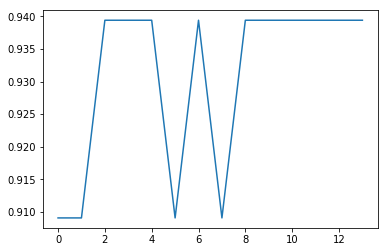

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(test_accuracies)